<a href="https://colab.research.google.com/github/fire-long/24-1AI-ML/blob/main/W11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7.1 투표 기반 분류기

In [43]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
    ]
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [44]:
for name, clf in voting_clf.named_estimators_.items():
  print(name, "=", clf.score(X_test, y_test))

lr = 0.864
rf = 0.896
svc = 0.896


In [45]:
voting_clf.predict(X_test[:1])

array([1])

In [46]:
[clf.predict(X_test[:1]) for clf in voting_clf.estimators_]

[array([1]), array([1]), array([0])]

In [47]:
voting_clf.score(X_test, y_test)

0.912

In [48]:
#voting_clf.voting = "soft"
#voting_clf.named_estimators["svc"].probability=False
#voting_clf.fit(X_train, y_train)
#voting_clf.score(X_test, y_test)

AttributeError: predict_proba is not available when  probability=False

In [49]:
voting_clf.voting = "soft"
voting_clf.named_estimators["svc"].probability=True
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.92

# 7.2 배깅과 페이스팅

## 7.2.1 사이킷런의 배깅과 페이스팅

In [50]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

In [51]:
pasting_clf =  BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42, bootstrap=False)
pasting_clf.fit(X_train, y_train)

BaggingClassifier(bootstrap=False, estimator=DecisionTreeClassifier(),
                  max_samples=100, n_estimators=500, n_jobs=-1,
                  random_state=42)

## 7.2.2 OOB 평가

In [52]:
#bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, oob_score = False, n_jobs=-1, random_state=42)
#bag_clf.fit(X_train, y_train)
#bag_clf.oob_score_

In [53]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, oob_score = True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.896

In [54]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.92

In [55]:
bag_clf.oob_decision_function_[:3]

array([[0.32352941, 0.67647059],
       [0.3375    , 0.6625    ],
       [1.        , 0.        ]])

# 7.4 랜덤 포레스트

In [56]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16,
                                 n_jobs = -1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [57]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes = 16),
    n_estimators=500, n_jobs=-1, random_state=42
)

In [58]:
import numpy as np
#동일한 예측 하는지 비교
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)
np.all(y_pred_bag == y_pred_rf)

True

## 7.4.2 특성 중요도

In [59]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris.data, iris.target)
for score, name in zip(rnd_clf.feature_importances_, iris.data.columns):
  print(round(score, 2), name)

0.11 sepal length (cm)
0.02 sepal width (cm)
0.44 petal length (cm)
0.42 petal width (cm)


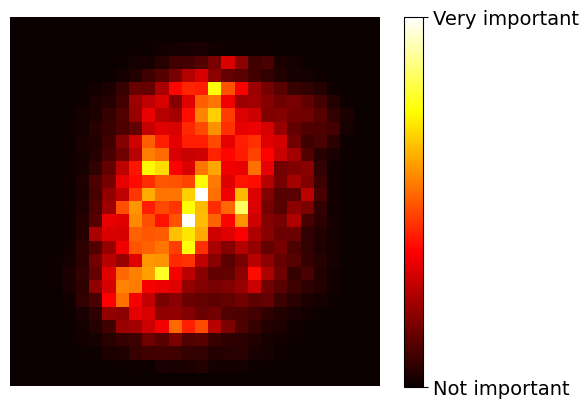

In [60]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

X_mnist, y_mnist = fetch_openml('mnist_784', return_X_y=True, as_frame=False, parser='auto')
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_mnist, y_mnist)

heatmap_image = rnd_clf.feature_importances_.reshape(28, 28)
plt.imshow(heatmap_image, cmap="hot")
cbar=plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'], fontsize=14)
plt.axis("off")
plt.show()

# 7.5 부스팅

## 7.5.1 AdaBoost

In [61]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators = 30,
    learning_rate=0.5, random_state=42
)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=30, random_state=42)

In [62]:
ada_clf.score(X_test, y_test)

0.904

In [63]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators = 30,
    learning_rate=0.5, random_state=42
)
ada_clf.fit(X_train, y_train)
ada_clf.score(X_test, y_test)

0.904

## 7.5.2 그레이디언트 부스팅

In [20]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0] ** 2 + 0.05 * np.random.randn(100)#y = 3x^2+가우스 잡음
tree_reg1=DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [21]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [22]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [23]:
X_new = np.array([[-0.4], [0.], [0.5]])
sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

array([0.49484029, 0.04021166, 0.75026781])

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [25]:
gbrt_best = GradientBoostingRegressor(
    max_depth=2, learning_rate=0.05, n_estimators=500,
    n_iter_no_change=10, random_state=42
)
gbrt_best.fit(X, y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=500,
                          n_iter_no_change=10, random_state=42)

In [26]:
gbrt_best.n_estimators_

92

## 7.5.3 히스토그램 기반 그레이디언트 부스팅

In [29]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# 캘리포니아 주택 데이터셋 불러오기
housing_raw = fetch_california_housing(as_frame=True)
housing = housing_raw.frame

# 데이터셋의 'ocean_proximity' 열 추가 (임의로 추가)
import numpy as np
housing['ocean_proximity'] = np.random.choice(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], size=len(housing))

# 타겟 변수 분리
housing_labels = housing["MedHouseVal"]
housing = housing.drop("MedHouseVal", axis=1)

In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder

hgb_reg = make_pipeline(
    make_column_transformer((OrdinalEncoder(), ["ocean_proximity"]),
                            remainder="passthrough"),
    HistGradientBoostingRegressor(categorical_features=[0], random_state=42)
)
hgb_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['ocean_proximity'])])),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features=[0],
                                               random_state=42))])

# 7.6 스태킹

In [33]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
    ],
    final_estimator = RandomForestClassifier(random_state=43),
    cv=5#교차 검증 폴드 개수
)
stacking_clf.fit(X_train, y_train)
stacking_clf.score(X_test, y_test)

0.92

# 연습문제 8.MNIST 데이터에 앙상블 적용하기

### a.MNIST 데이터를 불러들여 훈련세트, 검증세트, 테스트세트로 나눔

In [64]:
X_train, y_train = X_mnist[:50_000], y_mnist[:50_000]
X_valid, y_valid = X_mnist[50_000:60_000], y_mnist[50_000:60_000]
X_test, y_test = X_mnist[60_000:], y_mnist[60_000:]

### b. 랜덤 포레스트 분류기, 엑스트라 트리 분류기, SVM 분류기 등 다양한 예측기를 훈련시킴

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
svm_clf = LinearSVC(max_iter=100, tol=20, dual=True, random_state=42)
mlp_clf = MLPClassifier(random_state=42)

estimators = [random_forest_clf, extra_trees_clf, svm_clf, mlp_clf]
for estimator in estimators:
  print("훈련 모델:", estimator)
  estimator.fit(X_train, y_train)

훈련 모델: RandomForestClassifier(random_state=42)
훈련 모델: ExtraTreesClassifier(random_state=42)
훈련 모델: LinearSVC(max_iter=100, random_state=42, tol=20)
훈련 모델: MLPClassifier(random_state=42)


In [66]:
[estimator.score(X_valid, y_valid) for estimator in estimators]

[0.9736, 0.9743, 0.8662, 0.9613]

### c. 검증 세트에서 개개의 분류기보다 더 높은 성능을 내도록 이들을 직접 투표 방법을 사용해 앙상블로 연결해보기

In [67]:
from sklearn.ensemble import VotingClassifier

named_estimators = [
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_trees_clf),
    ("svm_clf", svm_clf),
    ("mlp_clf", mlp_clf),
]
voting_clf = VotingClassifier(named_estimators)
voting_clf.fit(X_train, y_train)
voting_clf.score(X_valid, y_valid)

0.975

### d.앙상블 얻고 나면 테스트 세트로 확인하기. 개개의 분류기와 비교해서 성능이 얼마나 향상되나?

In [68]:
voting_clf.score(X_test, y_test)

0.9712

In [69]:
#개별 분류기의 테스트 성능
[estimator.score(X_test, y_test.astype(np.int64)) for estimator in voting_clf.estimators_]

[0.968, 0.9703, 0.8612, 0.9618]

### e. 성능이 제일 낮은 분류기를 제외하고 다시 앙상블을 만들었을 때 테스트 성능이 얼마나 향상되는가?

In [70]:
svm_clf_trained = voting_clf.named_estimators_.pop("svm_clf")
voting_clf.estimators_.remove(svm_clf_trained)

In [71]:
voting_clf.score(X_valid, y_valid)

0.9761

In [72]:
voting_clf.score(X_test, y_test)

0.9733